In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error



# DATASET



In [2]:
data = pd.read_csv('store5.csv')
data

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,1452,2013-01-01,5,AUTOMOTIVE,0.000,0,NaN
1,1453,2013-01-01,5,BABY CARE,0.000,0,NaN
2,1454,2013-01-01,5,BEAUTY,0.000,0,NaN
3,1455,2013-01-01,5,BEVERAGES,0.000,0,NaN
4,1456,2013-01-01,5,BOOKS,0.000,0,NaN
...,...,...,...,...,...,...,...
55567,3000586,2017-08-15,5,POULTRY,241.011,1,47.57
55568,3000587,2017-08-15,5,PREPARED FOODS,52.121,0,47.57
55569,3000588,2017-08-15,5,PRODUCE,1357.823,4,47.57
55570,3000589,2017-08-15,5,SCHOOL AND OFFICE SUPPLIES,0.000,0,47.57


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55572 entries, 0 to 55571
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           55572 non-null  int64  
 1   date         55572 non-null  object 
 2   store_nbr    55572 non-null  int64  
 3   family       55572 non-null  object 
 4   sales        55572 non-null  float64
 5   onpromotion  55572 non-null  int64  
 6   dcoilwtico   38379 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 3.0+ MB


In [4]:
data.describe()

,id,store_nbr,sales,onpromotion,dcoilwtico
count,5.557200e+04,55572.0,55572.000000,55572.000000,38379.000000
mean,1.501021e+06,5.0,280.580231,2.687864,67.925589
std,8.662894e+05,0.0,652.588149,11.748996,25.666659
min,1.452000e+03,5.0,0.000000,0.000000,26.190000
25%,7.512365e+05,5.0,1.000000,0.000000,46.380000
50%,1.501021e+06,5.0,19.000000,0.000000,53.330000
75%,2.250806e+06,5.0,237.000000,0.000000,95.800000
max,3.000590e+06,5.0,8216.620000,182.000000,110.620000


# PREPARE DATASET

In [5]:
#Drop kolom yang tidak digunakan
kolom = ['id', 'store_nbr', 'onpromotion', 'dcoilwtico']
data = data.drop(kolom,axis=1)

In [6]:
#Ubah date ke datetime
data["date"] = pd.to_datetime(data["date"],format="%Y-%m-%d")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55572 entries, 0 to 55571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    55572 non-null  datetime64[ns]
 1   family  55572 non-null  object        
 2   sales   55572 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.3+ MB


In [7]:
data = data.set_index('date')

# FAMILY

In [8]:
data_family = data[data['family'].isin(['HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE', 'LIQUOR,WINE,BEER'])]

In [9]:
sales_family = data_family.groupby('family')['sales'].sum()

In [10]:
sales_family

family
HOME CARE           239283.0
LADIESWEAR           14813.0
LAWN AND GARDEN       4970.0
LINGERIE             31561.0
LIQUOR,WINE,BEER    110414.0
Name: sales, dtype: float64

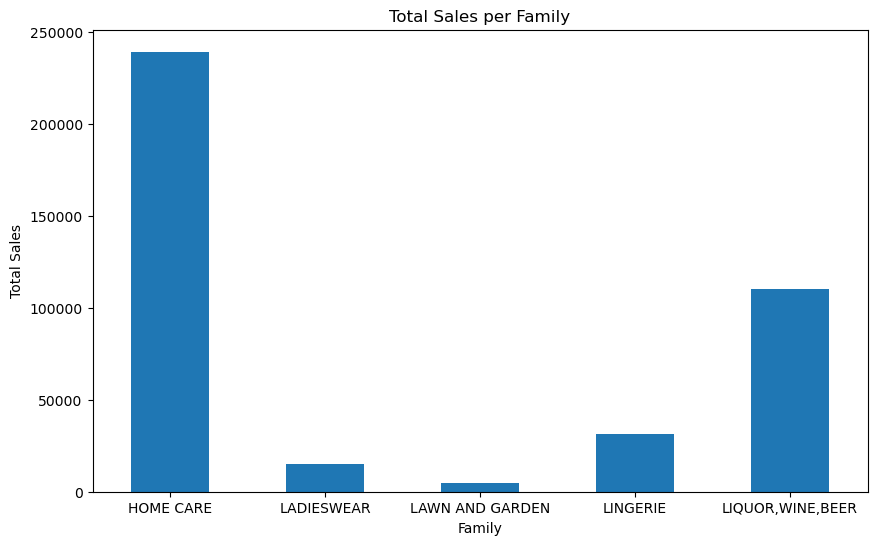

In [11]:
plt.figure(figsize=(10, 6))
sales_family.plot(kind='bar')
plt.xlabel('Family')
plt.ylabel('Total Sales')
plt.title('Total Sales per Family')
plt.xticks(rotation=0)
plt.show()

C:\Users\wisnu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wisnu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


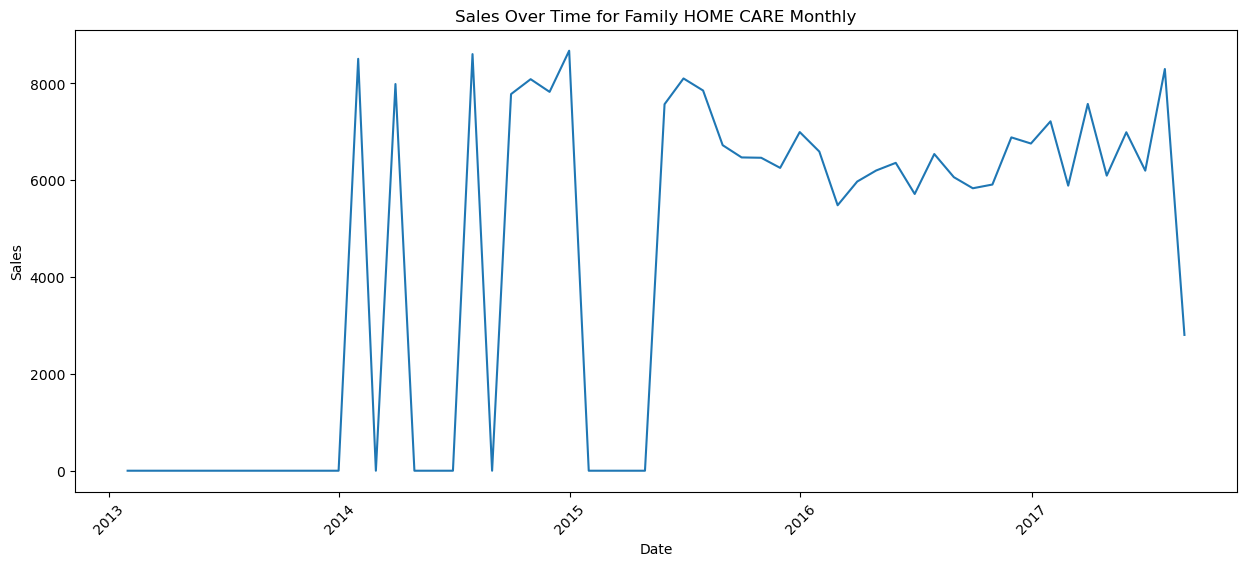

C:\Users\wisnu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wisnu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


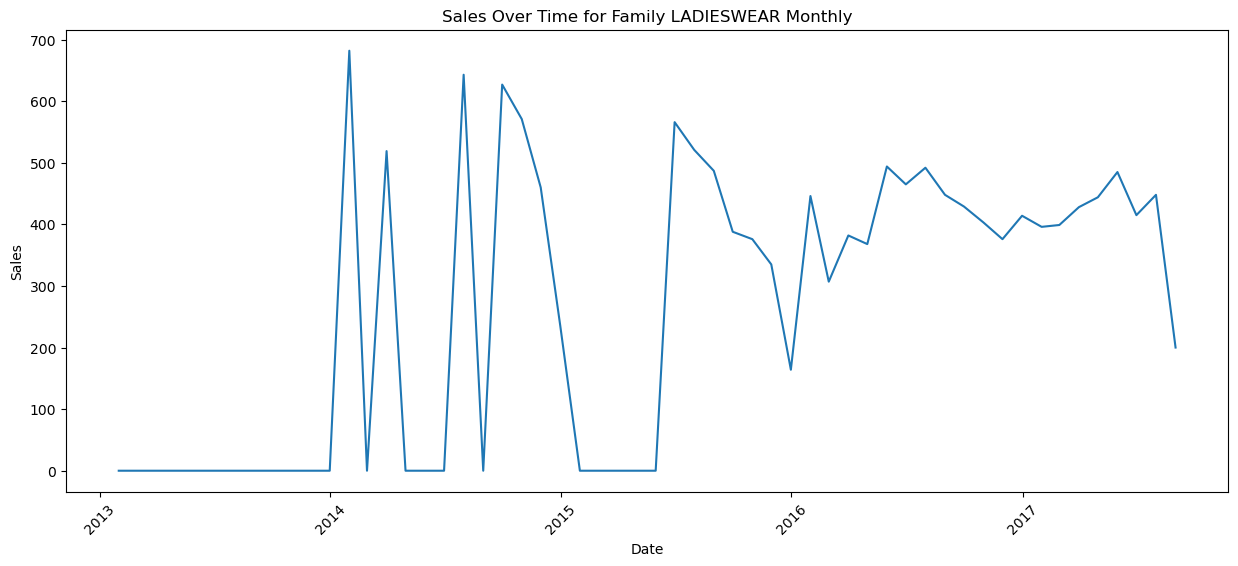

C:\Users\wisnu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wisnu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


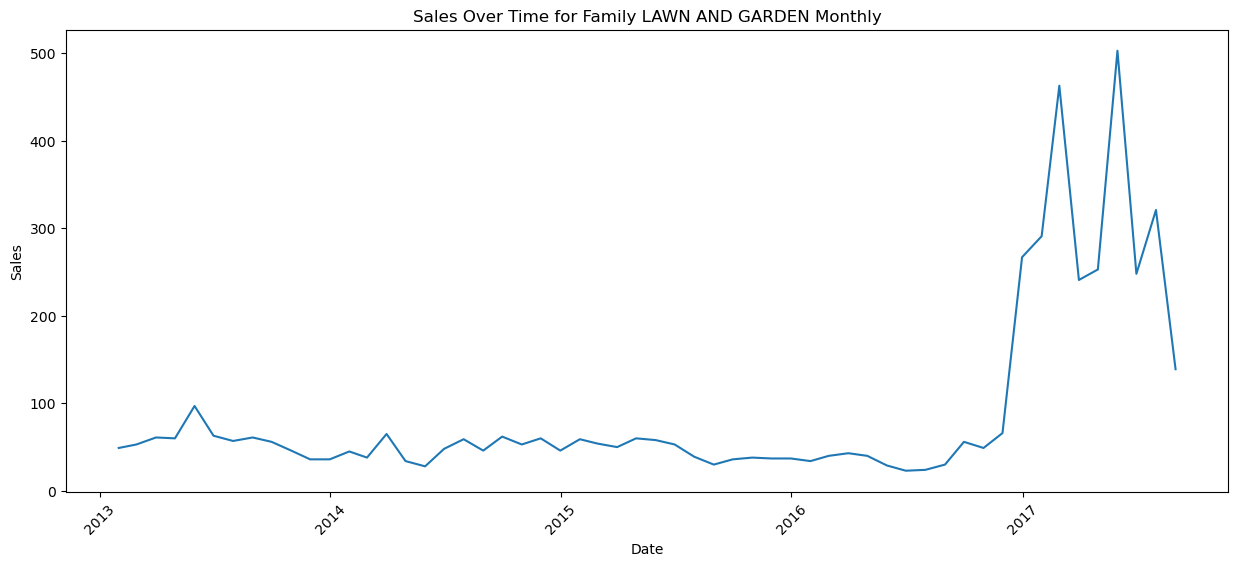

C:\Users\wisnu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wisnu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


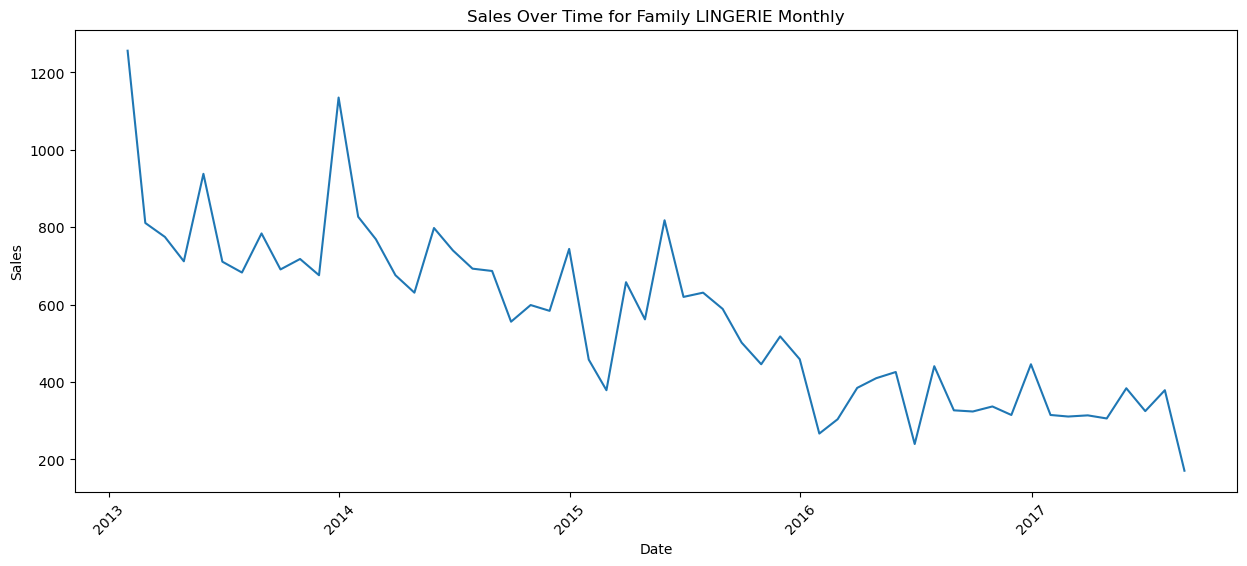

C:\Users\wisnu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wisnu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


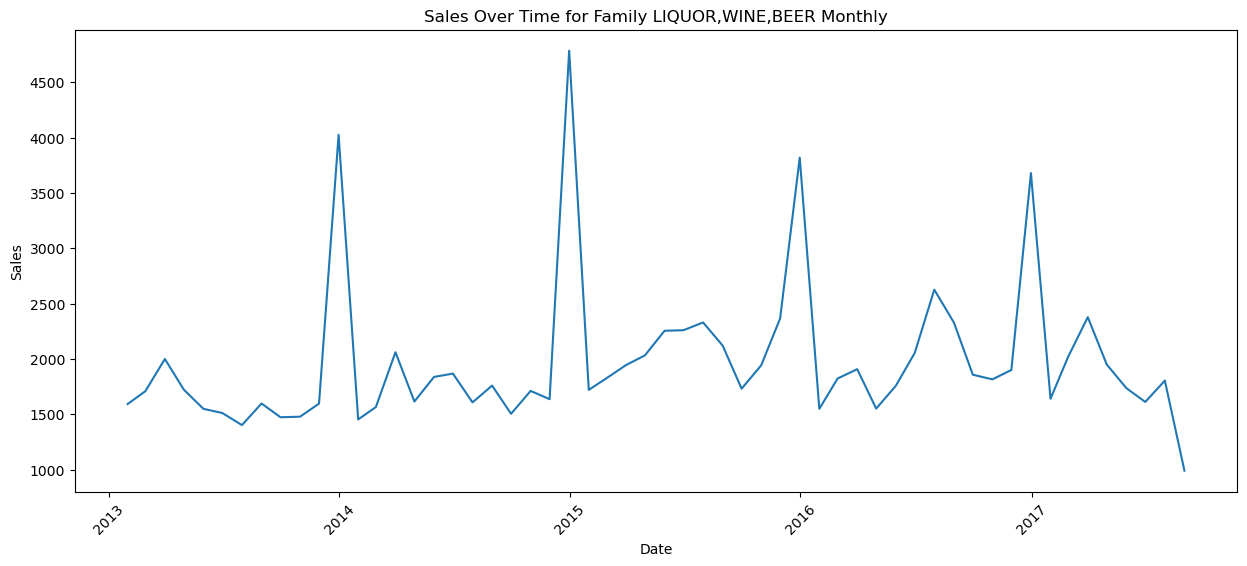

In [12]:
for family in data_family['family'].unique():
  df = data_family[data_family['family']==family].resample('M').sum()
  plt.figure(figsize=(15,6))
  sns.lineplot(data=df, x='date', y='sales')
  plt.xlabel('Date')
  plt.ylabel('Sales')
  plt.title(f'Sales Over Time for Family {family} Monthly')
  plt.xticks(rotation=45)
  plt.show()

# LIQUOR

In [13]:
liquor = data[data['family'] == 'LIQUOR,WINE,BEER'] #resample data menjadi bulanan
liquor = liquor.resample('W-MON').agg({
    'family': 'first',
    'sales': 'sum',
})
liquor

,family,sales
date,,
2013-01-07,"LIQUOR,WINE,BEER",274.0
2013-01-14,"LIQUOR,WINE,BEER",345.0
2013-01-21,"LIQUOR,WINE,BEER",360.0
2013-01-28,"LIQUOR,WINE,BEER",446.0
2013-02-04,"LIQUOR,WINE,BEER",392.0
...,...,...
2017-07-24,"LIQUOR,WINE,BEER",406.0
2017-07-31,"LIQUOR,WINE,BEER",427.0
2017-08-07,"LIQUOR,WINE,BEER",444.0


C:\Users\wisnu\AppData\Local\Temp\ipykernel_15004\3165204618.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f"Line Plot {liquor['family'][0]} Weekly", fontsize=20)


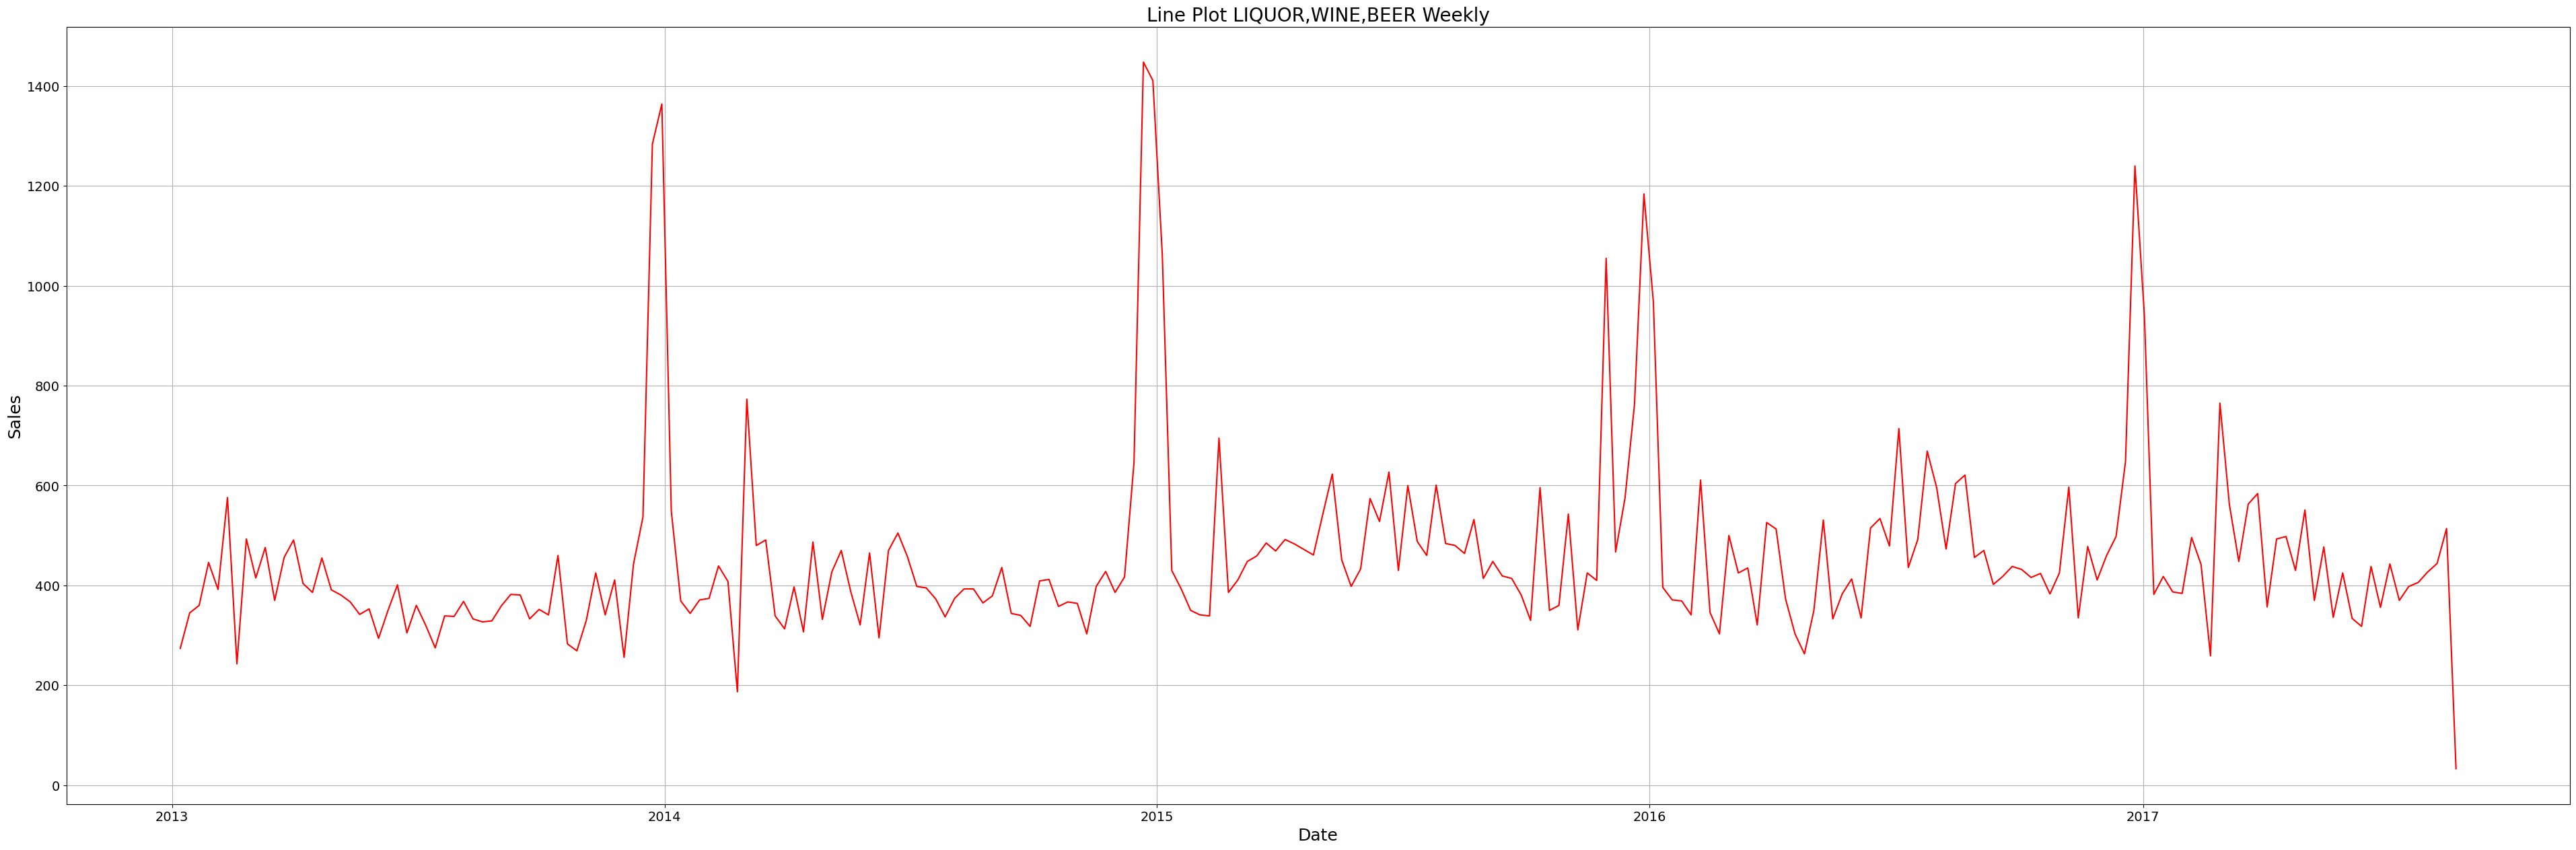

In [14]:
# Create the plot
plt.figure(figsize=(48, 15))
plt.plot(liquor.index, liquor['sales'], color='red')

# Add title and labels
plt.title(f"Line Plot {liquor['family'][0]} Weekly", fontsize=20)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Sales", fontsize=18)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

In [15]:
result = adfuller(liquor['sales'].diff().dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] <= 0.05:
  print("\033[91mThe series is stationary \033[0m")
else:
  print("The series is not stationary")

ADF Statistic: -8.310660788089727
p-value: 3.7968451685737667e-13
The series is stationary 


d = 1

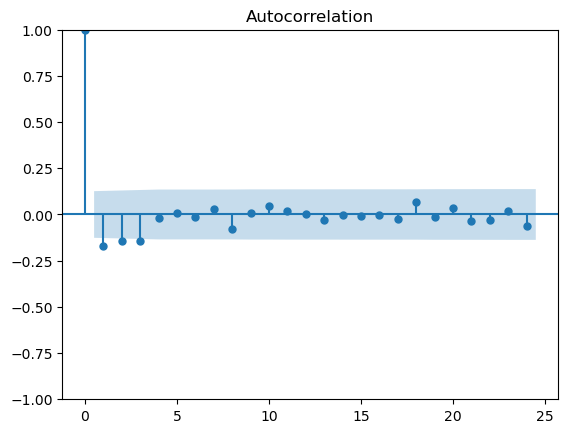

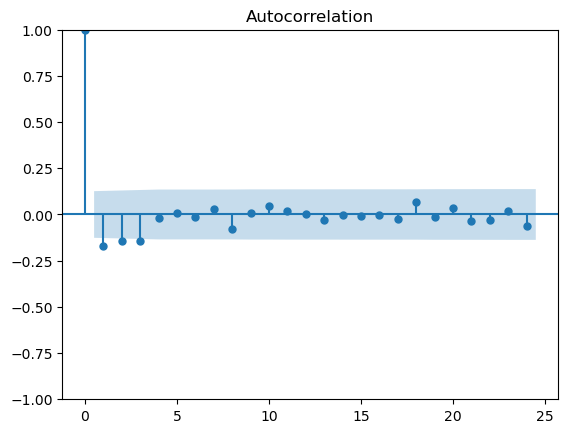

In [16]:
plot_acf(liquor['sales'].diff().dropna())

q = 3

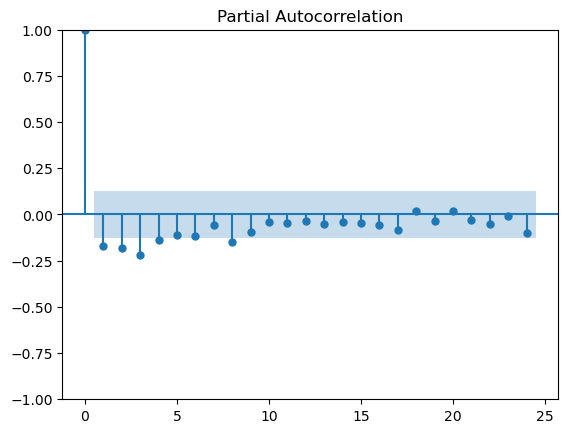

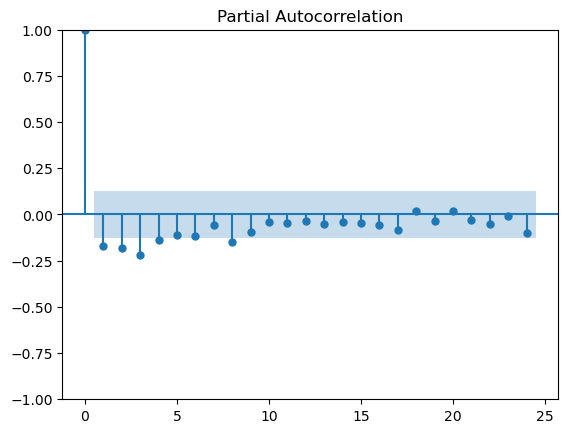

In [17]:
plot_pacf(liquor['sales'].diff().dropna())

p = 4

In [18]:
train_size = int(len(liquor)*0.8)

X_train = liquor['sales'][:train_size]
X_test = liquor['sales'][train_size:]

train_data = liquor['sales'][:train_size]
test_data = liquor['sales'][train_size:]

In [19]:
train_data

date
2013-01-07    274.0
2013-01-14    345.0
2013-01-21    360.0
2013-01-28    446.0
2013-02-04    392.0
              ...  
2016-08-15    604.0
2016-08-22    621.0
2016-08-29    456.0
2016-09-05    470.0
2016-09-12    402.0
Freq: W-MON, Name: sales, Length: 193, dtype: float64

In [20]:
test_data

date
2016-09-19     418.0
2016-09-26     438.0
2016-10-03     432.0
2016-10-10     416.0
2016-10-17     424.0
2016-10-24     383.0
2016-10-31     425.0
2016-11-07     597.0
2016-11-14     335.0
2016-11-21     478.0
2016-11-28     411.0
2016-12-05     460.0
2016-12-12     498.0
2016-12-19     648.0
2016-12-26    1240.0
2017-01-02     941.0
2017-01-09     382.0
2017-01-16     418.0
2017-01-23     387.0
2017-01-30     384.0
2017-02-06     496.0
2017-02-13     442.0
2017-02-20     259.0
2017-02-27     765.0
2017-03-06     562.0
2017-03-13     448.0
2017-03-20     563.0
2017-03-27     584.0
2017-04-03     357.0
2017-04-10     493.0
2017-04-17     498.0
2017-04-24     430.0
2017-05-01     551.0
2017-05-08     370.0
2017-05-15     477.0
2017-05-22     336.0
2017-05-29     425.0
2017-06-05     334.0
2017-06-12     318.0
2017-06-19     438.0
2017-06-26     356.0
2017-07-03     443.0
2017-07-10     370.0
2017-07-17     398.0
2017-07-24     406.0
2017-07-31     427.0
2017-08-07     444.0
2017-08-

In [21]:
model = ARIMA(train_data, order=(4,1,3), seasonal_order=(4,1,3,52))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\wisnu\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\wisnu\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                    SARIMAX Results                                     
Dep. Variable:                            sales   No. Observations:                  193
Model:             ARIMA(4, 1, 3)x(4, 1, 3, 52)   Log Likelihood                -893.064
Date:                          Fri, 21 Jun 2024   AIC                           1816.127
Time:                                  19:39:58   BIC                           1860.252
Sample:                              01-07-2013   HQIC                          1834.058
                                   - 09-12-2016                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1064      0.974      0.109      0.913      -1.802       2.015
ar.L2         -0.3003      0.491     -0.611      0.

In [22]:
forecast_test = model_fit.predict(start=test_data.index.min(), end=test_data.index.max(),typ="linear")
forecast_train = model_fit.predict(start=train_data.index.min(), end=train_data.index.max(),typ="linear")

C:\Users\wisnu\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


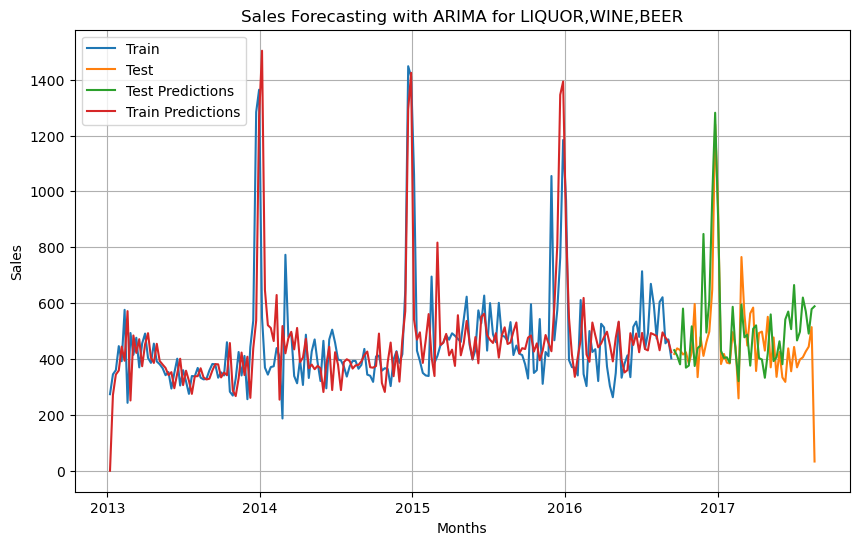

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(X_train.index, train_data, label='Train')
plt.plot(X_test.index, test_data, label='Test')
plt.plot(X_test.index, forecast_test, label='Test Predictions')
plt.plot(X_train.index, forecast_train, label='Train Predictions')
plt.title(f'Sales Forecasting with ARIMA for {family}')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
 # Calculate RMSE
rmse_test = np.sqrt(mean_squared_error(test_data, forecast_test))
rmse_train = np.sqrt(mean_squared_error(train_data, forecast_train))

print('-------------------RMSE-------------------')
print(f'Test RMSE: {rmse_test}')
print(f'Train RMSE: {rmse_train}')
print('------------------------------------------\n\n')

-------------------RMSE-------------------
Test RMSE: 154.8359739076895
Train RMSE: 158.42119947409725
------------------------------------------


